#CHATBOT

Chatbot merupakan bagian dari Natural Language Processing yang digunakan untuk percakapan dengan pengguna melalui teks dan ucapan.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!pip -q install gtts
!pip -q install SpeechRecognition
!pip -q install keras
!pip -q install tensorflow


In [10]:
# Import Libraries
import json
import nltk
import time
import random
import string
import pickle
import numpy as np
import pandas as pd
from gtts import gTTS
from io import BytesIO
import tensorflow as tf
import IPython.display as ipd
import speech_recognition as sr
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPool1D


In [11]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [12]:
with open('/content/drive/MyDrive/My Portofolio/NLP_ChatBot/kampus_merdeka.json') as content:
  data1 = json.load(content)
# Mendapatkan semua data ke dalam list
tags = [] # data tag
inputs = [] # data input atau pattern
responses = {} # data respon
words = [] # Data kata
classes = [] # Data Kelas atau Tag
documents = [] # Data Kalimat Dokumen
ignore_words = ['?', '!'] # Mengabaikan tanda spesial karakter

for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
    for pattern in intent['patterns']:
      w = nltk.word_tokenize(pattern)
      words.extend(w)
      documents.append((w, intent['tag']))
      # add to our classes list
      if intent['tag'] not in classes:
        classes.append(intent['tag'])

# Konversi data json ke dalam dataframe
data = pd.DataFrame({"patterns":inputs, "tags":tags})

In [13]:
# Removing Punctuations (Menghilangkan Punktuasi)
data['patterns'] = data['patterns'].apply(lambda wrd:[ltrs.lower()
              for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))

In [14]:
# Tokenize the data (Tokenisasi Data)
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['patterns'])
train = tokenizer.texts_to_sequences(data['patterns'])

In [15]:
# Apply padding
x_train = pad_sequences(train)

# Encoding the outputs
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [17]:
# input length
input_shape = x_train.shape[1]

In [18]:
# define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)

# output length
output_length = le.classes_.shape[0]
print("output length: ", output_length)

number of unique words :  77
output length:  40


Save Model

In [20]:
pickle.dump(words, open('/content/drive/MyDrive/My Portofolio/NLP_ChatBot/words.pkl','wb'))
pickle.dump(classes, open('/content/drive/MyDrive/My Portofolio/NLP_ChatBot/classes.pkl','wb'))

In [21]:
# Creating the model (Membuat Modeling)
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i) # Layer Embedding
x = LSTM(10, return_sequences=True)(x) # Layer Long Short Term Memory
x = Flatten()(x) # Layer Flatten
x = Dense(output_length, activation="softmax")(x) # Layer Dense
model  = Model(i,x)

# Compiling the model (Kompilasi Model)
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

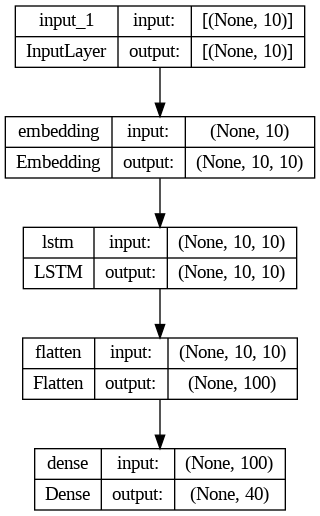

In [22]:
# Visualization Plot Architecture Model (Visualisasi Plot Arsitektur Model)
plot_model(model, to_file='/content/drive/MyDrive/My Portofolio/NLP_ChatBot/model_plot.png', show_shapes=True, show_layer_names=True)

In [23]:
model.summary() # Menampilkan Parameter Model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 embedding (Embedding)       (None, 10, 10)            780       
                                                                 
 lstm (LSTM)                 (None, 10, 10)            840       
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 40)                4040      
                                                                 
Total params: 5660 (22.11 KB)
Trainable params: 5660 (22.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# Training the model (Latih Model Data)
train = model.fit(x_train, y_train, epochs=400)

Epoch 1/400
3/3 [==============================] - 3s 11ms/step - loss: 3.6824 - accuracy: 0.0750
Epoch 2/400
3/3 [==============================] - 0s 8ms/step - loss: 3.6746 - accuracy: 0.1375
Epoch 3/400
3/3 [==============================] - 0s 10ms/step - loss: 3.6645 - accuracy: 0.1375
Epoch 4/400
3/3 [==============================] - 0s 9ms/step - loss: 3.6537 - accuracy: 0.1375
Epoch 5/400
3/3 [==============================] - 0s 8ms/step - loss: 3.6410 - accuracy: 0.1375
Epoch 6/400
3/3 [==============================] - 0s 9ms/step - loss: 3.6246 - accuracy: 0.1375
Epoch 7/400
3/3 [==============================] - 0s 8ms/step - loss: 3.6067 - accuracy: 0.1375
Epoch 8/400
3/3 [==============================] - 0s 9ms/step - loss: 3.5837 - accuracy: 0.1375
Epoch 9/400
3/3 [==============================] - 0s 8ms/step - loss: 3.5559 - accuracy: 0.1375
Epoch 10/400
3/3 [==============================] - 0s 9ms/step - loss: 3.5273 - accuracy: 0.1375
Epoch 11/400
3/3 [=========

Model Analys

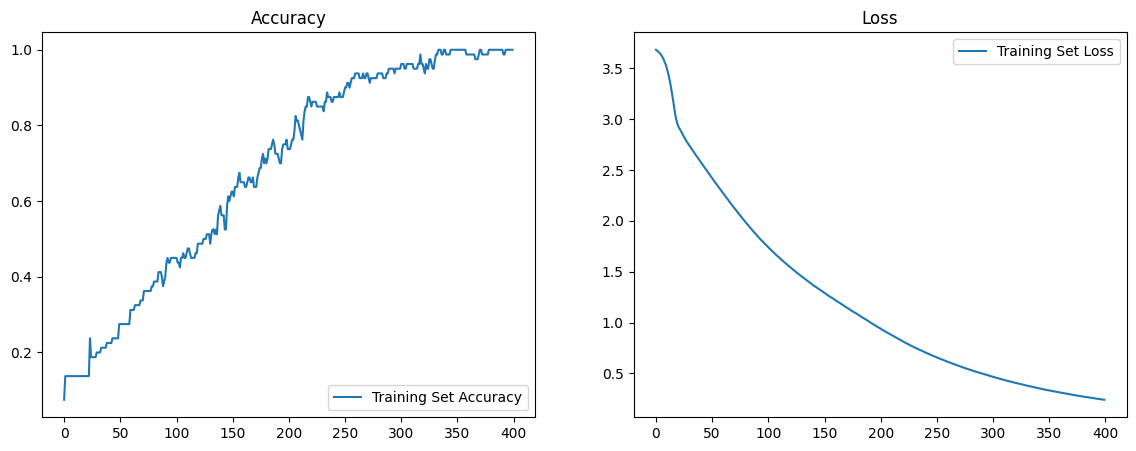

In [25]:
# Plotting model Accuracy and Loss (Visualisasi Plot Hasil Akurasi dan Loss)
# Plot Akurasi
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'],label='Training Set Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train.history['loss'],label='Training Set Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

Testing

In [26]:
# Membuat Input Chat
while True:
  texts_p = []
  prediction_input = input('User : ')

  # Menghapus punktuasi dan konversi ke huruf kecil
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  # Tokenisasi dan Padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  # Mendapatkan hasil keluaran pada model
  output = model.predict(prediction_input)
  output = output.argmax()

  # Menemukan respon sesuai data tag dan memainkan voice bot
  response_tag = le.inverse_transform([output])[0]
  print("Chatbot : ", random.choice(responses[response_tag]))
  tts = gTTS(random.choice(responses[response_tag]), lang='id')
  tts.save('/content/drive/MyDrive/My Portofolio/NLP_ChatBot/chatbot.wav')
  time.sleep(0.08)
  ipd.display(ipd.Audio('/content/drive/MyDrive/My Portofolio/NLP_ChatBot/chatbot.wav', autoplay=True))
  print("="*60 + "\n")
  if response_tag == "goodbye":
    break

User : hai
1/1 [==============================] - 0s 495ms/step
Chatbot :  Helo! Ini Kadekbot. Lagi kepo tentang kampus merdeka ya?


KeyboardInterrupt: Interrupted by user